In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression as LR
from scipy import stats 
import pickle
from datascience import *
import pymc3 as pm 
from pymc3 import * 
%matplotlib inline
import seaborn as sns 

In [2]:
dem = pd.read_csv("dem_candidates.csv")

In [3]:
dem.columns

Index(['Candidate', 'State', 'District', 'Office Type', 'Race Type',
       'Race Primary Election Date', 'Primary Status', 'Primary Runoff Status',
       'General Status', 'Partisan Lean', 'Primary %', 'Won Primary', 'Race',
       'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?',
       'Obama Alum?', 'Party Support?', 'Emily Endorsed?',
       'Guns Sense Candidate?', 'Biden Endorsed?', 'Warren Endorsed? ',
       'Sanders Endorsed?', 'Our Revolution Endorsed?',
       'Justice Dems Endorsed?', 'PCCC Endorsed?', 'Indivisible Endorsed?',
       'WFP Endorsed?', 'VoteVets Endorsed?', 'No Labels Support?'],
      dtype='object')

<AxesSubplot:xlabel='Self-Funder?', ylabel='Primary %'>

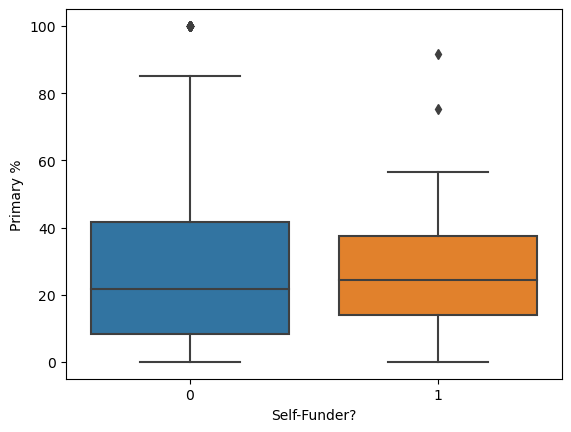

In [4]:
dem_ohe = dem.fillna(0).replace("No", 0).replace("Yes", 1).replace("White", 0).replace("Nonwhite", 1)
sns.boxplot(data = dem_ohe, x = "Self-Funder?", y = "Primary %")

<AxesSubplot:xlabel='Obama Alum?', ylabel='Primary %'>

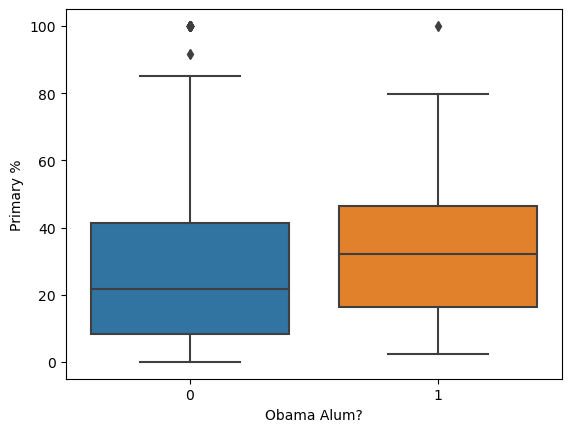

In [16]:
sns.boxplot(data = dem_ohe, x = "Obama Alum?", y = "Primary %")

In [5]:
dem.isna()

,Candidate,State,District,Office Type,Race Type,Race Primary Election Date,Primary Status,Primary Runoff Status,General Status,Partisan Lean,...,Biden Endorsed?,Warren Endorsed?,Sanders Endorsed?,Our Revolution Endorsed?,Justice Dems Endorsed?,PCCC Endorsed?,Indivisible Endorsed?,WFP Endorsed?,VoteVets Endorsed?,No Labels Support?
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,False,True
807,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
808,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True
809,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,False,False,True


<Figure size 800x1000 with 0 Axes>

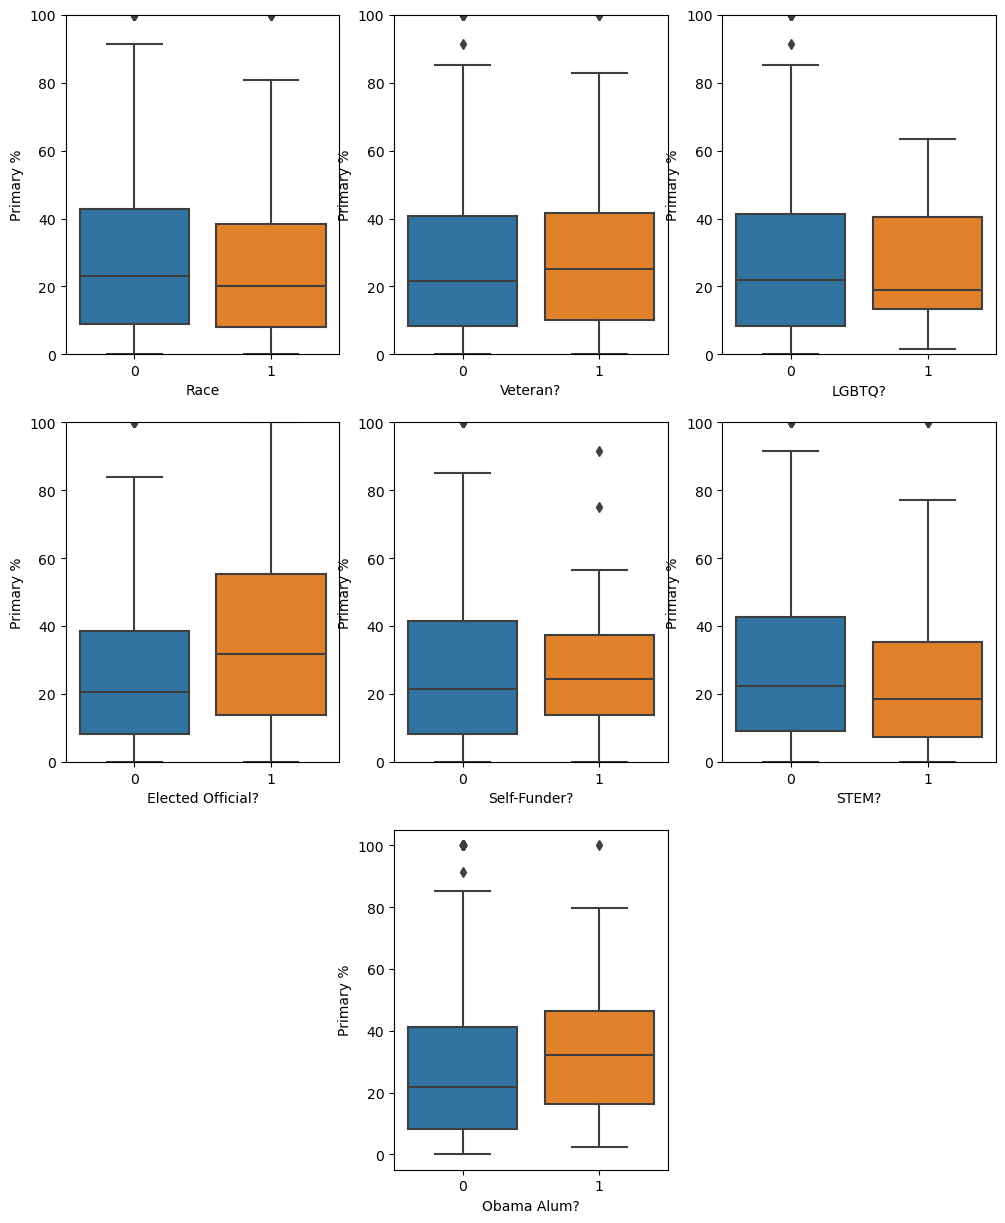

In [39]:
f = plt.figure(figsize=(8, 10))

f, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12, 15))

trial = np.array(['Race', 'Veteran?', 'LGBTQ?', 'Elected Official?', 'Self-Funder?', 'STEM?', 'Obama Alum?'])
axarr = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

sns.boxplot(data = dem_ohe, x = "Race", y = "Primary %", ax = ax1)
sns.boxplot(data = dem_ohe, x = "Veteran?", y = "Primary %", ax = ax2)
sns.boxplot(data = dem_ohe, x = "LGBTQ?", y = "Primary %", ax = ax3)
sns.boxplot(data = dem_ohe, x = "Elected Official?", y = "Primary %", ax = ax4)
sns.boxplot(data = dem_ohe, x = "Self-Funder?", y = "Primary %", ax = ax5)
sns.boxplot(data = dem_ohe, x = "STEM?", y = "Primary %", ax = ax6)
sns.boxplot(data = dem_ohe, x = "Obama Alum?", y = "Primary %", ax = ax8)

plt.setp(ax1, ylim=(0,100))
plt.setp(ax2, ylim=(0,100))
plt.setp(ax3, ylim=(0,100))
plt.setp(ax4, ylim=(0,100))
plt.setp(ax5, ylim=(0,100))
plt.setp(ax6, ylim=(0,100))

f.delaxes(ax7)
f.delaxes(ax9)

plt.show();